In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("movie_metadata.csv")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [123]:
#bu kısımda temel kütüphaneleri kurdum ve veri setini yükledim.

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [125]:
df.isnull().sum()

print(df.isnull().mean())

color                        0.003768
director_name                0.020623
num_critic_for_reviews       0.009915
duration                     0.002974
director_facebook_likes      0.020623
actor_3_facebook_likes       0.004561
actor_2_name                 0.002578
actor_1_facebook_likes       0.001388
gross                        0.175292
genres                       0.000000
actor_1_name                 0.001388
movie_title                  0.000000
num_voted_users              0.000000
cast_total_facebook_likes    0.000000
actor_3_name                 0.004561
facenumber_in_poster         0.002578
plot_keywords                0.030339
movie_imdb_link              0.000000
num_user_for_reviews         0.004164
language                     0.002776
country                      0.000991
content_rating               0.060083
budget                       0.097561
title_year                   0.021416
actor_2_facebook_likes       0.002578
imdb_score                   0.000000
aspect_ratio

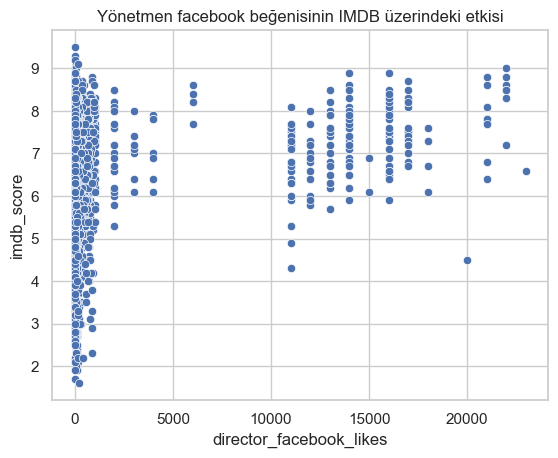

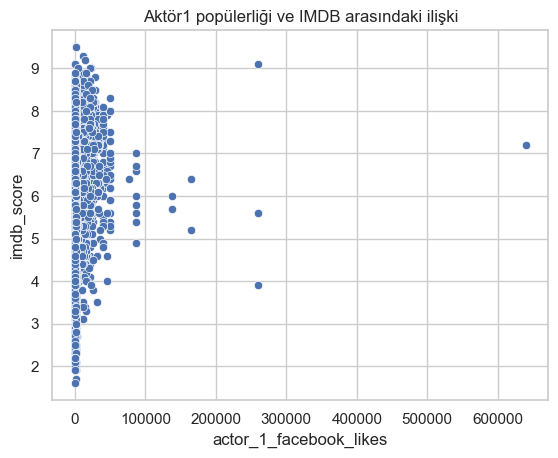

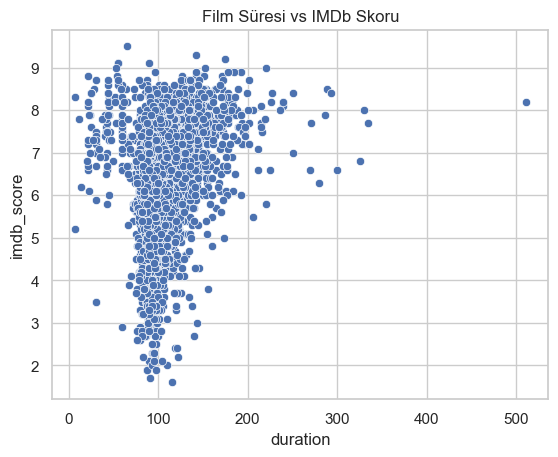

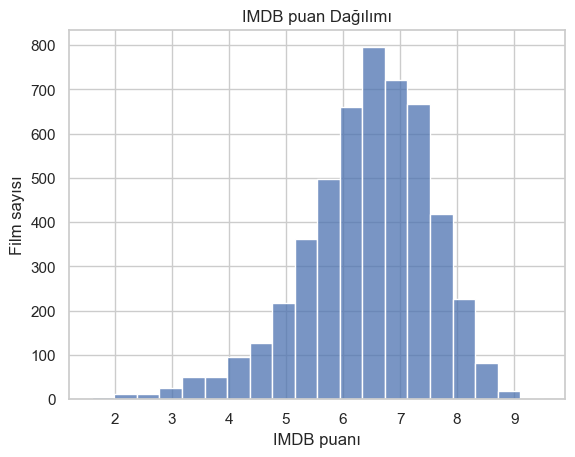

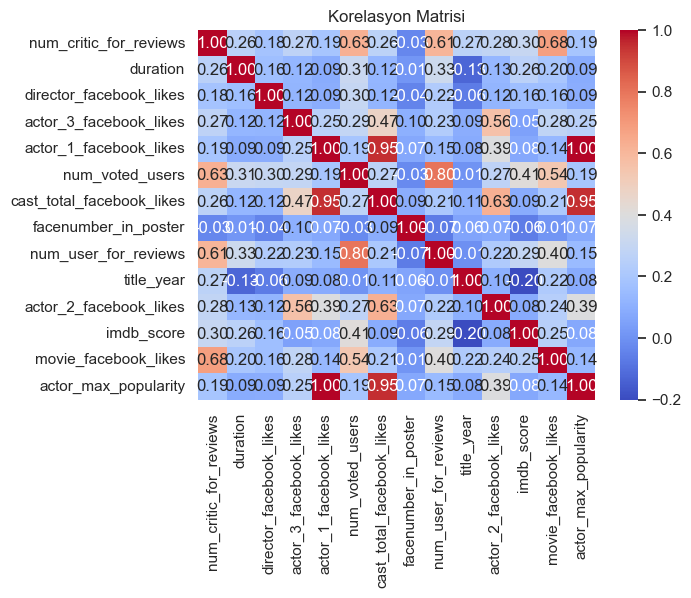

color                        19
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_1_facebook_likes        0
genres                        0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
facenumber_in_poster          0
movie_imdb_link               0
num_user_for_reviews          0
language                      0
country                       0
content_rating                0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
movie_facebook_likes          0
actor_max_popularity          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   dir

In [126]:
sns.set(style="whitegrid")

df['director_name'] = df['director_name'].fillna('Unknown')

df['director_facebook_likes'] = df['director_facebook_likes'].fillna(df['director_facebook_likes'].median())

df['title_year'] = df['title_year'].fillna(df['title_year'].median())

df['movie_facebook_likes'] = df['movie_facebook_likes'].fillna(df['movie_facebook_likes'].median())

df['content_rating'] = df['content_rating'].fillna('Not Rated')

num_cols = ['duration', 'num_critic_for_reviews', 'num_user_for_reviews',
            'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 
            'facenumber_in_poster']
for col in num_cols:
    df[col]= df[col].fillna(df[col].median())

cat_cols = ['language', 'country']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Gereksiz sütunlar
df = df.drop(['gross', 'aspect_ratio', 'plot_keywords', 'budget',
              'actor_1_name', 'actor_2_name', 'actor_3_name'], axis=1,
             errors= 'ignore' )

df['actor_max_popularity'] = df[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].max(axis=1)

# Plot Yapımı
sns.scatterplot(x='director_facebook_likes', y='imdb_score', data=df)
plt.title("Yönetmen facebook beğenisinin IMDB üzerindeki etkisi")
plt.show()

sns.scatterplot(x='actor_1_facebook_likes', y='imdb_score', data=df)
plt.title("Aktör1 popülerliği ve IMDB arasındaki ilişki")
plt.show()

sns.scatterplot(x='duration', y='imdb_score', data=df)
plt.title("Film Süresi vs IMDb Skoru")
plt.show()

sns.histplot(df['imdb_score'], bins=20)
plt.title("IMDB puan Dağılımı")
plt.xlabel("IMDB puanı")
plt.ylabel("Film sayısı")
plt.show()



sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

df.describe()
print(df.isnull().sum())
df.info()

df['director_name'] = df['director_name'].fillna('Unknown')

df.loc[df['director_name'] == 'Unknown', 'director_facebook_likes'] = 0  


In [127]:
features = ['num_user_for_reviews', 'num_critic_for_reviews', 'duration', 'movie_facebook_likes']

X = df[features]

y = df['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(y_pred)


[5.99408209 6.53900579 6.52942133 ... 6.24739805 6.4722959  5.67155911]


In [128]:
X = df.drop(['imdb_score', 'movie_title', 'genres', 'director_name', 'movie_imdb_link'], axis=1, errors ='ignore')

y = df['imdb_score']

X = pd.get_dummies(X, columns=['color', 'language', 'country', 'content_rating'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

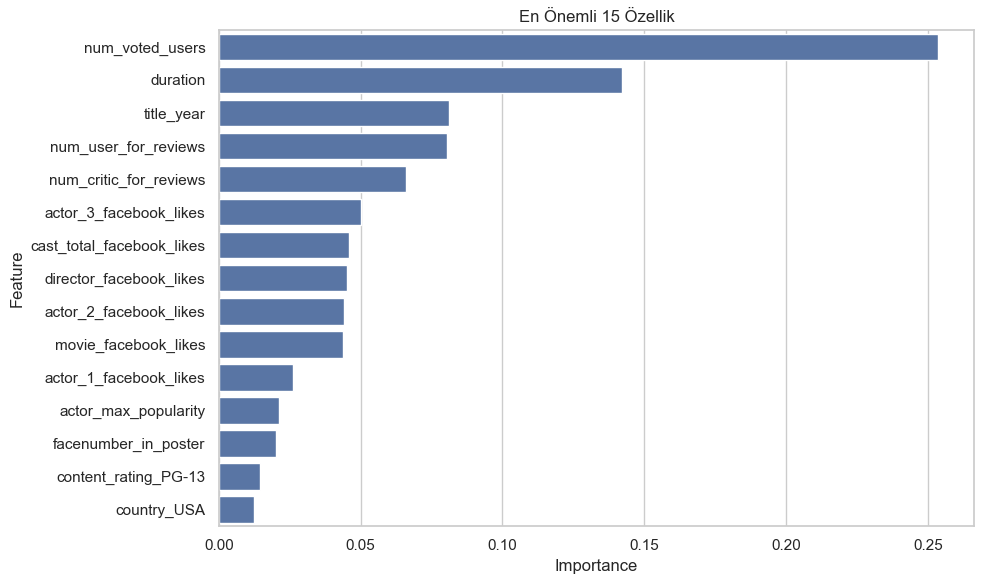

In [129]:
importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title("En Önemli 15 Özellik")
plt.tight_layout()
plt.show()

In [130]:
print("R² Skoru:", r2_score(y_test, y_pred))

print("RMSE:", root_mean_squared_error(y_test, y_pred))

R² Skoru: 0.44782011409051936
RMSE: 0.8455601525495647
